# Simple Harmonic Oscillator

Next, we'll look at example of how to use the code to simulate and visaulise a simple dynamical system, the simple harmonic oscillator. This will provide an introduction to the framework and how to use it for simulating Hamiltonian systems. This will allow us to later delve into how the code actually achieves this, and how to extend it to more complex systems.

In this chapter, we will discuss how to simulate and visualise a dynamical system. To do this, we will utilise a pre-existing implementation of the simple harmonic oscillator in `hdynamics/dynamics/harmonic_oscillator.py` to discuss how we can simulate and plot dynamical systems in our framework.

## Simple Harmonic Oscillator Hamiltonian

For a mass $m$ attached to a spring with spring constant $k$, and ignoring damping, the Hamiltonian is:

$$
H = \frac{p^2}{2m} + \frac{1}{2} k q^2
$$

The resulting Hamilton's equations are:

$$
\dot{q} = \frac{p}{m}\\
\dot{p} = -kq 
$$

## The `Harmonic Oscillator` Class

The file `harmonic_oscillator.py` contains the class `HarmonicOscillator` that inherits from the abstract class `Dynamics` defined in `hdynamics/dynamics/hdynamics.py`. The constructor sets up the mass `m` and spring constant `k`, which are used to define the Hamiltonian of the system. It also calls the constructor of the superclass `Dynamics` with a `cdim` of 1, indicating that the system has one degree of freedom (position and momentum).

This class implements the Hamiltonian method `H`, allowing the class to be instantiated and used to simulate the dynamics of the harmonic oscillator.

It also contains the methods `plot_trajectory` which is designed to use the output of the `generate_trajectory` method of the `Dynamics` class to plot the position of the oscillator as a function of time.

## Example Simulation

In the following code blocks we will define a harmonic oscillator, simulate the progression of the system over time and, plot the results. 

### Creating the Harmonic Oscillator

To create the `HarmonicOscillator`, we must import it, then create it. We'll give it a mass of 10kg and a spring constant of 100N/m.

In [1]:
from hdynamics.dynamics.harmonic_oscillator import HarmonicOscillator

harmonic_oscillator = HarmonicOscillator(m=10, k=100)

### Running the Simulation

Next, we'll define initial condition of the system as a JAX array. We'll give the system an initial displacement of 1m and an initial momentum of 0kg m/s. 

Then, we will use the `generate_trajectory` method of the `HarmonicOscillator` class, passing the initial condition and defining a time step of 0.01 seconds and a total of 1000 steps. This returns both the trajectory of the system and the time span of the simulation in JAX arrays

`trajectory` has a shape of `(1001, 2)`. The first dimension relates to the time, and the second dimension relates to the position and momentum of the system. In this second dimension, the first column is the position, and the second column is the momentum. `time_span` has a shape of `(1001,)`, which contains the time values corresponding to each step in the trajectory. `trajectory` and `time_span` each have 1001 entries in their first dimension, corresponding to the initial condition and the 1000 steps taken in the simulation.

In [2]:
import jax.numpy as jnp

initial_condition = jnp.array([1.0, 0.0])

trajectory, t_span = harmonic_oscillator.generate_trajectory(initial_condition, 0.01, 1000)

print(f"Trajectory shape: {trajectory.shape}")
print("Trajectory:", trajectory)

print(f"Time span shape: {t_span.shape}")
print("Time span:", t_span)

Trajectory shape: (1001, 2)
Trajectory: [[ 1.          0.        ]
 [ 0.99950004 -0.9998335 ]
 [ 0.9980006  -1.9986669 ]
 ...
 [ 0.9896017  -4.5279784 ]
 [ 0.98457956 -5.51517   ]
 [ 0.97857374 -6.4967575 ]]
Time span shape: (1001,)
Time span: [ 0.         0.01       0.02      ...  9.9800005  9.990001  10.       ]


### Plotting the Results

Finally, we will plot the trajectory of the harmonic oscillator using the `plot_trajectory` method of the `HarmonicOscillator` class. This will create a plot of the position of the oscillator as a function of time. This function takes the trajectory and time span as inputs, as well as a `matplotlib` axis object to plot on. The plot is a line graph, but also contains a point plotted at the end of the trajectory to emphasise the final position of the oscillator.

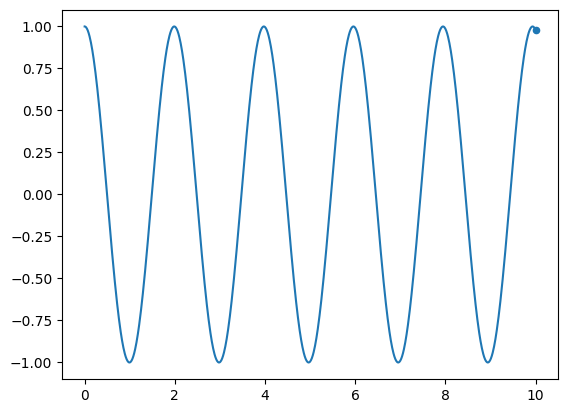

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

harmonic_oscillator.plot_trajectory(trajectory, t_span, ax)